You can view and run this project in Google Colab:

[Open the notebook in Colab](https://colab.research.google.com/drive/1Jia8n8eHDyhvs3GS1gTAAp6r07DWP3wc#scrollTo=pjGS7XdTYc5r)

---



<center>
  <img src="https://i.imgur.com/zze0EHS.png" alt="giki Logo" width="200">
  <div>

---


  </center>
    <h1><strong >Intrusion Detection System Using K-Means Clustering Algorithm</strong></h1>
    <h1><strong>CY331 - Network Security Project Code</strong></h1>
    <h2><strong>Group Members:</strong></h1>
    <h3><strong>Arsalan Khan 2022115</strong></h3>
    <h3><strong>Hassaan Ali Bukhari 2022654</strong></h3>
    <h3></h3>
    <h3><strong>BS Cybersecurity - 5th Semester</strong></h3>
    <h3><strong>Submitted to: Dr Zain Siddiqi</strong></h3>
  </div>


---

"""

## Overview of the Code

---



This project demonstrates the use of clustering algorithms on synthetic network traffic data to identify anomalies. The dataset (kddcup.data_10_percen_corrected) includes features commonly associated with network connections, such as packet counts, bytes transferred, error rates, and more. The aim of this analysis is to identify patterns and group similar data points together into clusters, and then highlight anomalies in these clusters.

The code involves the following steps:
1. **Synthetic Data Generation**: A synthetic dataset is generated with random values simulating network traffic data. This dataset includes various features that represent network connection attributes (e.g., duration, bytes sent/received, error rates). Additionally, a small fraction of data points are labeled as anomalies for testing purposes.
2. **Preprocessing**: The data is scaled to normalize the feature values, ensuring that they are on the same scale. This is crucial for clustering algorithms that are sensitive to the scale of the data.
3. **Clustering**: The `MiniBatchKMeans` clustering algorithm is applied to the data to group similar data points together. The optimal number of clusters is chosen, and the model is trained on the scaled data.
4. **Anomaly Detection**: A small percentage of the data points are labeled as anomalies, allowing the visualization and identification of outliers in the dataset.
5. **Visualization**: The clusters and anomalies are visualized in a scatter plot to highlight patterns in the data, with anomalies marked in red and normal data points in blue.





### About the Synthetic Data

---



The synthetic dataset generated in this project simulates network traffic and connection features that are commonly used in intrusion detection systems (IDS) and network monitoring. Each row in the dataset represents a network connection with attributes such as:
- **Duration**: Duration of the network connection.
- **Bytes Transferred**: Amount of data sent and received.
- **Error Rates**: Rates for various types of errors (e.g., server errors, remote errors).
- **Other Connection Metrics**: Number of failed logins, number of compromised events, etc.
  
In this synthetic dataset, the features are randomly generated, and a small percentage (1%) of the data points are deliberately marked as anomalies. These anomalies can represent unusual behavior, such as a sudden surge in failed login attempts, which may be indicative of a network attack or other suspicious activity.





### Code Overview

---



1. **Data Generation**:
   - The synthetic data generation function creates a dataframe with 100 samples (modifiable) and 40+ features.
   - Random values are assigned for each feature, and anomalies are added by marking a random subset of data points.
   
2. **Clustering**:
   - The MiniBatchKMeans clustering algorithm is used to create clusters of similar data points.
   - The clustering model helps to group network connections with similar characteristics.

3. **Anomaly Detection**:
   - Anomalies are flagged and visualized separately to help identify unusual or suspicious patterns in the data.

4. **Visualization**:
   - The code uses `matplotlib` and `seaborn` to plot the clusters and anomalies in the data, with anomalies shown in red and normal points in blue.
   - These plots help in visually understanding the data distribution and the presence of outliers.
"""


## Step 1: Import Libraries

---



In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Load and Inspect the Data

---




In [ ]:
import pandas as pd

# Define the columns for the KDDCup99 dataset
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
           'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
           'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
           'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
           'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
           'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
           'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'label']

# Read the uploaded file into a pandas DataFrame
data_file = 'kddcup.data_10_percent_corrected'  # The uploaded file name
data = pd.read_csv(data_file, names=columns)

# Display the first few rows to confirm it's loaded correctly
print(data.head())


   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

# Step 3: Data Inspection

---



In [ ]:
# Check the dataset structure
print(data.info())

# Display unique values in categorical columns
print("Unique protocol types:", data['protocol_type'].unique())
print("Unique services:", data['service'].unique())
print("Unique flags:", data['flag'].unique())
print("Unique labels:", data['label'].unique())

# Check label distribution
print("Label distribution:\n", data['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

# Step 4: Data Preprocessing

---





In [ ]:
# One-hot encode the categorical columns
data_encoded = pd.get_dummies(data, columns=['protocol_type', 'service', 'flag'])

# Verify the new structure
print("Shape after encoding:", data_encoded.shape)


Shape after encoding: (494021, 119)


# Step 5: Feature Normalization

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Separate the features (drop the 'label' column)
features = data_encoded.drop(columns=['label'])

# Normalize all features to a range of 0 to 1
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Convert back to a DataFrame
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

print("Shape after normalization:", features_scaled.shape)
print(features_scaled.head())


Shape after normalization: (494021, 118)
   duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0       0.0  2.610418e-07   0.001057   0.0             0.0     0.0  0.0   
1       0.0  3.446905e-07   0.000094   0.0             0.0     0.0  0.0   
2       0.0  3.389216e-07   0.000259   0.0             0.0     0.0  0.0   
3       0.0  3.158461e-07   0.000259   0.0             0.0     0.0  0.0   
4       0.0  3.129617e-07   0.000394   0.0             0.0     0.0  0.0   

   num_failed_logins  logged_in  num_compromised  ...  flag_REJ  flag_RSTO  \
0                0.0        1.0              0.0  ...       0.0        0.0   
1                0.0        1.0              0.0  ...       0.0        0.0   
2                0.0        1.0              0.0  ...       0.0        0.0   
3                0.0        1.0              0.0  ...       0.0        0.0   
4                0.0        1.0              0.0  ...       0.0        0.0   

   flag_RSTOS0  flag_RSTR  flag_S0  fla

In [ ]:
features_sampled = features_scaled.sample(frac=0.1, random_state=42)  # 10% sample


# Step 6: PCA for Dimensionality Reduction

---



In [ ]:
from sklearn.decomposition import PCA

# Reduce to 10 principal components
pca = PCA(n_components=10, random_state=42)
reduced_features = pca.fit_transform(features_scaled.iloc[:, :-1])  # Exclude cluster column


In [ ]:
from sklearn.cluster import MiniBatchKMeans
# Define the number of clusters
num_clusters = 10  # Example value, you can adjust as needed

# For KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters, max_iter=300, random_state=42)

# For MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans
mb_kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42, batch_size=10000)
mb_kmeans.fit(features_scaled.iloc[:, :-1])
mb_kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42, batch_size=10000)
mb_kmeans.fit(features_scaled.iloc[:, :-1])


MiniBatchKMeans(batch_size=10000, n_clusters=10, random_state=42)

# Step 7: KMeans Clustering

---



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set the number of clusters
num_clusters = 10

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_sampled)

# Get cluster assignments
clusters = kmeans.labels_

# Add cluster assignments to the dataset
features_sampled['Cluster'] = clusters

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(features_sampled.iloc[:, :-1], clusters)
print(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg}")


Silhouette Score for 10 clusters: 0.8767018951014598


# Step 8: Cluster Visualization

---



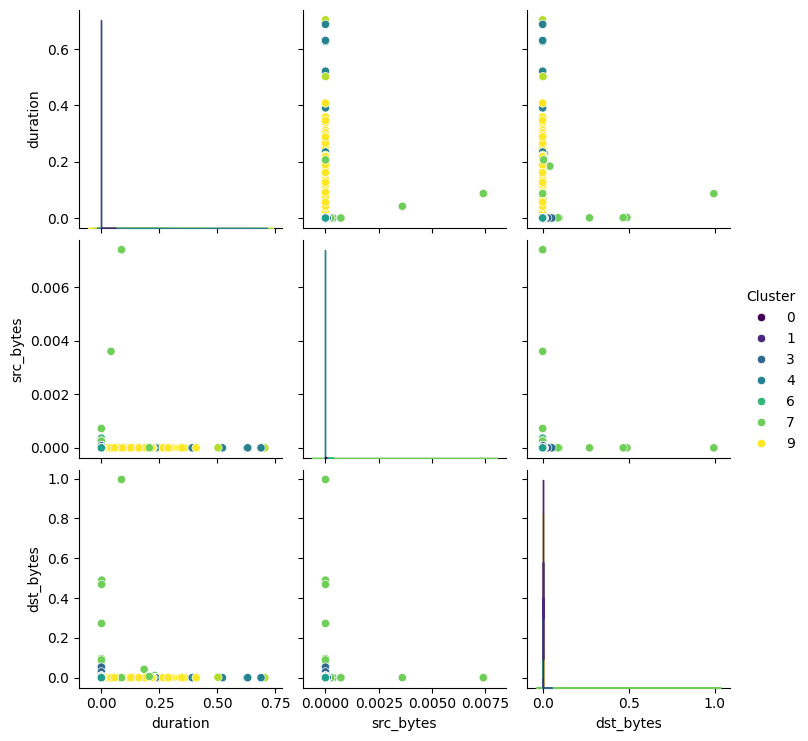

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add cluster labels to original data
features_sampled['Cluster'] = clusters

# Select a subset of features for pairplot
subset_features = features_sampled[['duration', 'src_bytes', 'dst_bytes', 'Cluster']]

# Pairplot with hue as cluster
sns.pairplot(subset_features, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

In [ ]:
cluster_summary = features_sampled.groupby('Cluster').mean()
print(cluster_summary)


             duration     src_bytes  dst_bytes      land  wrong_fragment  \
Cluster                                                                    
0        0.000000e+00  1.348856e-06   0.000000  0.000000        0.000000   
1        7.779467e-05  1.058857e-07   0.000016  0.000000        0.067295   
2        2.013167e-09  0.000000e+00   0.000000  0.000117        0.000000   
3        8.265920e-06  3.236598e-06   0.000887  0.000000        0.000000   
4        1.686505e-03  5.009882e-12   0.000000  0.000000        0.000000   
5        0.000000e+00  1.939785e-07   0.000000  0.000000        0.018018   
6        4.207262e-05  2.842942e-06   0.000071  0.000000        0.000000   
7        3.734905e-03  9.255893e-05   0.004212  0.000000        0.000000   
8        2.970759e-03  1.552284e-08   0.000008  0.000000        0.000000   
9        5.902356e-02  2.098327e-07   0.000016  0.000000        0.000000   

         urgent       hot  num_failed_logins  logged_in  num_compromised  ...  \
Cluste

# Step 9: Visualizing Clusters with PCA

---



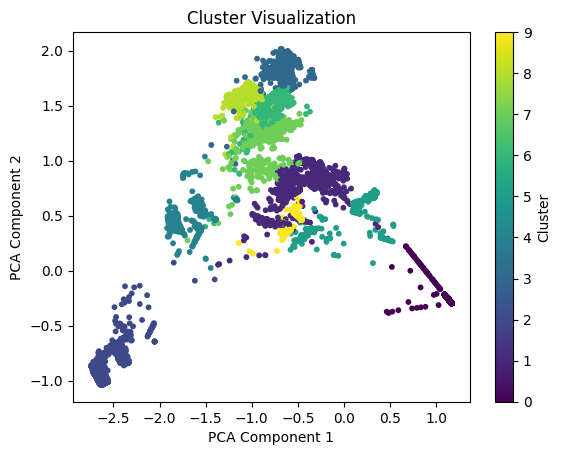

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_sampled.iloc[:, :-1])

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=10)
plt.title("Cluster Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


# Step 10: Silhouette Score for Different Cluster Sizes

---



In [ ]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_sampled.iloc[:, :-1])
    clusters = kmeans.labels_
    score = silhouette_score(features_sampled.iloc[:, :-1], clusters)
    print(f"Silhouette Score for {k} clusters: {score}")


Silhouette Score for 2 clusters: 0.6704916384521792
Silhouette Score for 3 clusters: 0.7816597833368657
Silhouette Score for 4 clusters: 0.8391690873494573
Silhouette Score for 5 clusters: 0.8588089140826596
Silhouette Score for 6 clusters: 0.8565252030574025
Silhouette Score for 7 clusters: 0.8631139651018973
Silhouette Score for 8 clusters: 0.8686736851651858
Silhouette Score for 9 clusters: 0.8734558243573176


In [ ]:
from sklearn.model_selection import train_test_split

# Split data
train_data, test_data = train_test_split(features_sampled, test_size=0.3, random_state=42)

# Train K-means on training data
kmeans.fit(train_data.iloc[:, :-1])

# Predict clusters for test data
test_clusters = kmeans.predict(test_data.iloc[:, :-1])

# Analyze cluster characteristics
test_data['Predicted_Cluster'] = test_clusters


# Step 11: Anomaly Detection

---



In [ ]:
# Calculate distances of each point from its cluster center
distances = kmeans.transform(features_sampled.iloc[:, :-1]).min(axis=1)

# Set threshold for anomalies (e.g., points far from centroids)
threshold = distances.mean() + 2 * distances.std()

# Flag anomalies
features_sampled['Anomaly'] = distances > threshold

# Check anomaly distribution
print(features_sampled['Anomaly'].value_counts())


Anomaly
False    46419
True      2983
Name: count, dtype: int64


# Step 12: Synthetic Data Generation

---

"""

The synthetic data generated for this project is designed to mimic the features typically found in network traffic datasets, which are often used in network intrusion detection systems (IDS). These datasets contain a variety of connection attributes that help identify normal and abnormal network behavior.

In this case, the synthetic dataset includes **40+ features** representing various characteristics of network connections, such as:
- **Duration**: Duration of the network connection (in seconds).
- **Bytes Transferred**: The amount of data sent (src_bytes) and received (dst_bytes) during the connection.
- **Flags and Indicators**: Binary features like `land`, `urgent`, `hot`, which may represent special flags or behavior in the connection.
- **Login Attempts**: Features like `num_failed_logins` and `logged_in`, indicating the number of failed login attempts or if a user is logged in.
- **Error Rates**: Features such as `serror_rate`, `srv_serror_rate`, representing the error rates for different types of service failures.

Additionally, this synthetic dataset also includes outliers or **anomalies**, which are randomly inserted into the dataset. These anomalies could represent abnormal patterns, such as unusual spikes in traffic or failed login attempts, that may indicate potential network threats like Denial of Service (DoS) attacks, intrusion attempts, or other forms of malicious behavior.

By simulating realistic network traffic data with both normal and anomalous patterns, this synthetic dataset provides a basis for testing clustering and anomaly detection techniques, helping to identify patterns and behaviors that deviate from the norm.

The synthetic dataset allows for testing and experimenting with machine learning algorithms without the need for actual network data, which may be difficult to obtain or anonymize.
"""


In [ ]:
import numpy as np
import pandas as pd

# Define synthetic data generation function
def generate_synthetic_data(num_samples=100):
    # Create synthetic data with random values based on the feature columns
    synthetic_data = pd.DataFrame({
        'duration': np.random.randint(1, 5000, num_samples),  # Simulating durations ranging from 1 to 5000 seconds
        'src_bytes': np.random.randint(0, 50000, num_samples),  # Source bytes ranging from 0 to 50000
        'dst_bytes': np.random.randint(0, 50000, num_samples),  # Destination bytes ranging from 0 to 50000
        'land': np.random.choice([0, 1], num_samples, p=[0.98, 0.02]),  # 'land' feature: rare 1's
        'wrong_fragment': np.random.choice([0, 1], num_samples, p=[0.95, 0.05]),  # Rare wrong fragments
        'urgent': np.random.choice([0, 1], num_samples, p=[0.9, 0.1]),  # Urgent flag: low occurrence
        'hot': np.random.choice([0, 1], num_samples, p=[0.95, 0.05]),  # Hot flag: low occurrence
        'num_failed_logins': np.random.randint(0, 10, num_samples),  # Failed login attempts
        'logged_in': np.random.choice([0, 1], num_samples),  # Whether the user is logged in or not
        'num_compromised': np.random.randint(0, 5, num_samples),  # Number of compromised events
        'root_shell': np.random.choice([0, 1], num_samples),  # Root shell: rare occurrence
        'su_attempted': np.random.randint(0, 5, num_samples),  # Sudo attempts
        'num_root': np.random.randint(0, 2, num_samples),  # Number of root accesses
        'num_file_creations': np.random.randint(0, 10, num_samples),  # File creations per user
        'num_shells': np.random.randint(0, 5, num_samples),  # Number of shell instances
        'num_access_files': np.random.randint(0, 50, num_samples),  # Number of access attempts
        'num_outbound_cmds': np.random.choice([0, 1], num_samples),  # Outbound commands flag
        'is_host_login': np.random.choice([0, 1], num_samples),  # Is the login a host login?
        'is_guest_login': np.random.choice([0, 1], num_samples),  # Is it a guest login?
        'count': np.random.randint(0, 200, num_samples),  # Count of connections
        'srv_count': np.random.randint(0, 200, num_samples),  # Server connection counts
        'serror_rate': np.random.uniform(0, 0.5, num_samples),  # Server error rate
        'srv_serror_rate': np.random.uniform(0, 0.5, num_samples),  # Server-side error rate
        'rerror_rate': np.random.uniform(0, 0.5, num_samples),  # Remote error rate
        'srv_rerror_rate': np.random.uniform(0, 0.5, num_samples),  # Server-side remote error rate
        'same_srv_rate': np.random.uniform(0, 1, num_samples),  # Same service rate
        'diff_srv_rate': np.random.uniform(0, 1, num_samples),  # Different service rate
        'srv_diff_host_rate': np.random.uniform(0, 1, num_samples),  # Server diff host rate
        'dst_host_count': np.random.randint(0, 100, num_samples),  # Destination host count
        'dst_host_srv_count': np.random.randint(0, 100, num_samples),  # Destination host service count
        'dst_host_same_srv_rate': np.random.uniform(0, 1, num_samples),  # Same service rate for destination hosts
        'dst_host_diff_srv_rate': np.random.uniform(0, 1, num_samples),  # Different service rate for destination hosts
        'dst_host_same_src_port_rate': np.random.uniform(0, 1, num_samples),  # Same source port rate for destination hosts
        'dst_host_srv_diff_host_rate': np.random.uniform(0, 1, num_samples),  # Destination host service diff rate
        'dst_host_serror_rate': np.random.uniform(0, 0.5, num_samples),  # Destination host error rate
        'dst_host_srv_serror_rate': np.random.uniform(0, 0.5, num_samples),  # Destination host server-side error rate
        'dst_host_rerror_rate': np.random.uniform(0, 0.5, num_samples),  # Destination host remote error rate
        'dst_host_srv_rerror_rate': np.random.uniform(0, 0.5, num_samples),  # Destination host server-side remote error rate
    })

    # Add a column to simulate anomalies (e.g., 1% of the data will be anomalies)
    anomaly_indices = np.random.choice(synthetic_data.index, size=int(0.10 * num_samples), replace=False)
    synthetic_data['Anomaly'] = 0
    synthetic_data.loc[anomaly_indices, 'Anomaly'] = 1  # Mark anomalies as 1

    # Add clusters for visualization (randomly assign clusters for visualization purposes)
    synthetic_data['Cluster'] = np.random.randint(0, 10, num_samples)

    # Return synthetic data
    return synthetic_data

# Generate synthetic data for testing (100 samples)
synthetic_data = generate_synthetic_data(num_samples=100)

# Display the first few rows of synthetic data
print(synthetic_data.head())


   duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0       917      47113      30621     0               0       0    0   
1      4045      24902      33553     0               0       0    0   
2       155      33853       3445     0               0       1    0   
3      3734       5788      23794     0               0       0    0   
4      4525      14796      44714     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  dst_host_same_srv_rate  \
0                  8          0                4  ...                0.804105   
1                  3          0                0  ...                0.686315   
2                  2          1                3  ...                0.727829   
3                  0          1                0  ...                0.331559   
4                  4          0                4  ...                0.155830   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                0.558

# Cunfusion matrix

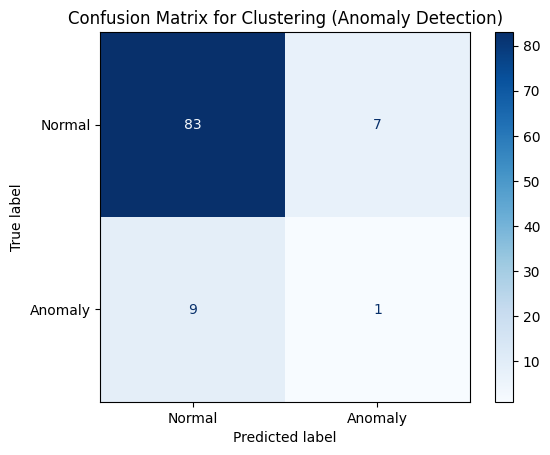

Confusion Matrix:
[[83  7]
 [ 9  1]]


In [ ]:
# Import the necessary library for plotting
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Assume that we treat 'Anomaly' as the true label (0 = Normal, 1 = Anomaly)
# We treat the cluster with the most anomalies as the anomaly cluster (here we assume it's cluster 0)
predicted_anomalies = synthetic_data['Cluster'] == 0  # Assume cluster 0 is the anomaly cluster
true_anomalies = synthetic_data['Anomaly'] == 1  # True anomaly labels (1 = Anomaly, 0 = Normal)

# Compute the confusion matrix
cm = confusion_matrix(true_anomalies, predicted_anomalies)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
disp.plot(cmap="Blues", values_format="d")

# Add title to the plot
plt.title("Confusion Matrix for Clustering (Anomaly Detection)")
plt.show()

# Print out the confusion matrix
print("Confusion Matrix:")
print(cm)


# Step 13: Preprocess Synthetic Data

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the synthetic data to match the feature range
scaler = MinMaxScaler()
synthetic_data_scaled = scaler.fit_transform(synthetic_data)

# Convert to DataFrame
synthetic_data_scaled = pd.DataFrame(synthetic_data_scaled, columns=synthetic_data.columns)

# Display the scaled synthetic data
print(synthetic_data_scaled.head())


   duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0  0.167554   0.953219   0.613907   0.0             0.0     0.0  0.0   
1  0.808275   0.500275   0.672867   0.0             0.0     0.0  0.0   
2  0.011471   0.682811   0.067425   0.0             0.0     1.0  0.0   
3  0.744572   0.110488   0.476623   0.0             0.0     0.0  0.0   
4  0.906596   0.294186   0.897303   0.0             0.0     0.0  0.0   

   num_failed_logins  logged_in  num_compromised  ...  dst_host_same_srv_rate  \
0           0.888889        0.0             1.00  ...                0.801435   
1           0.333333        0.0             0.00  ...                0.678047   
2           0.222222        1.0             0.75  ...                0.721534   
3           0.000000        1.0             0.00  ...                0.306432   
4           0.444444        0.0             1.00  ...                0.122351   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                0.563

In [ ]:
# Get the feature names from the trained model (this is based on the features used to train the model)
model_features = features_scaled.columns.tolist()

# Check the synthetic data columns
synthetic_data_scaled_columns = synthetic_data_scaled.columns.tolist()

# Display which columns are missing in the synthetic data
missing_columns = set(model_features) - set(synthetic_data_scaled_columns)
print(f"Missing columns: {missing_columns}")


Missing columns: {'protocol_type_udp', 'service_sunrpc', 'service_nnsp', 'flag_RSTOS0', 'service_ldap', 'service_courier', 'service_rje', 'service_IRC', 'flag_SH', 'service_shell', 'service_printer', 'service_imap4', 'service_iso_tsap', 'service_supdup', 'service_http', 'service_pop_2', 'service_nntp', 'service_smtp', 'protocol_type_icmp', 'service_Z39_50', 'service_netbios_ns', 'service_kshell', 'service_ecr_i', 'flag_RSTO', 'protocol_type_tcp', 'service_hostnames', 'service_discard', 'flag_S2', 'service_systat', 'service_netbios_dgm', 'service_name', 'service_red_i', 'service_ntp_u', 'service_mtp', 'service_ftp_data', 'service_netbios_ssn', 'service_csnet_ns', 'service_klogin', 'service_uucp', 'service_domain_u', 'service_bgp', 'service_tim_i', 'service_time', 'flag_S3', 'service_other', 'service_ctf', 'service_ftp', 'service_efs', 'flag_SF', 'service_remote_job', 'flag_S1', 'service_netstat', 'flag_RSTR', 'service_echo', 'service_login', 'service_urp_i', 'service_link', 'flag_OTH', 

In [ ]:
# Ensure synthetic_data_scaled is a copy to avoid the warning
synthetic_data_scaled = synthetic_data_scaled.copy()

# Step 1: Add missing columns to the synthetic data and initialize them with zero values
for col in missing_columns:
    synthetic_data_scaled[col] = 0

# Step 2: Reorder columns to match the model's original columns
synthetic_data_scaled = synthetic_data_scaled[model_features]

# Step 3: Remove the 'Cluster' column if it exists
if 'Cluster' in synthetic_data_scaled.columns:
    synthetic_data_scaled = synthetic_data_scaled.drop(columns=['Cluster'])

# Step 4: Use the trained KMeans model to predict clusters for the synthetic data
synthetic_clusters = kmeans.predict(synthetic_data_scaled)

# Add the cluster assignments to the synthetic data using .loc to avoid the warning
synthetic_data_scaled.loc[:, 'Cluster'] = synthetic_clusters

# Display the synthetic data with assigned clusters
print(synthetic_data_scaled.head())


   duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0  0.167554   0.953219   0.613907   0.0             0.0     0.0  0.0   
1  0.808275   0.500275   0.672867   0.0             0.0     0.0  0.0   
2  0.011471   0.682811   0.067425   0.0             0.0     1.0  0.0   
3  0.744572   0.110488   0.476623   0.0             0.0     0.0  0.0   
4  0.906596   0.294186   0.897303   0.0             0.0     0.0  0.0   

   num_failed_logins  logged_in  num_compromised  ...  flag_RSTO  flag_RSTOS0  \
0           0.888889        0.0             1.00  ...          0            0   
1           0.333333        0.0             0.00  ...          0            0   
2           0.222222        1.0             0.75  ...          0            0   
3           0.000000        1.0             0.00  ...          0            0   
4           0.444444        0.0             1.00  ...          0            0   

   flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  Cluster  
0 

In [ ]:
# Calculate distances of each point from its assigned cluster center
distances = kmeans.transform(synthetic_data_scaled.iloc[:, :-1]).min(axis=1)

# Set a threshold for anomaly detection (e.g., points far from the centroid)
threshold = distances.mean() + 2 * distances.std()

# Flag anomalies
synthetic_data_scaled['Anomaly'] = distances > threshold

# Display the anomalies
print(synthetic_data_scaled[synthetic_data_scaled['Anomaly'] == True])


    duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
42   0.73474   0.702898   0.971787   0.0             0.0     0.0  0.0   

    num_failed_logins  logged_in  num_compromised  ...  flag_RSTOS0  \
42                1.0        0.0              0.5  ...            0   

    flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  Cluster  \
42          0        0        0        0        0        0        0        1   

    Anomaly  
42     True  

[1 rows x 120 columns]


# Step 14: Predict Clusters for Synthetic Data

---



   duration  src_bytes Anomaly  Cluster
0  0.167554   0.953219  Normal        8
1  0.808275   0.500275  Normal        5
2  0.011471   0.682811  Normal        8
3  0.744572   0.110488  Normal        8
4  0.906596   0.294186  Normal        6


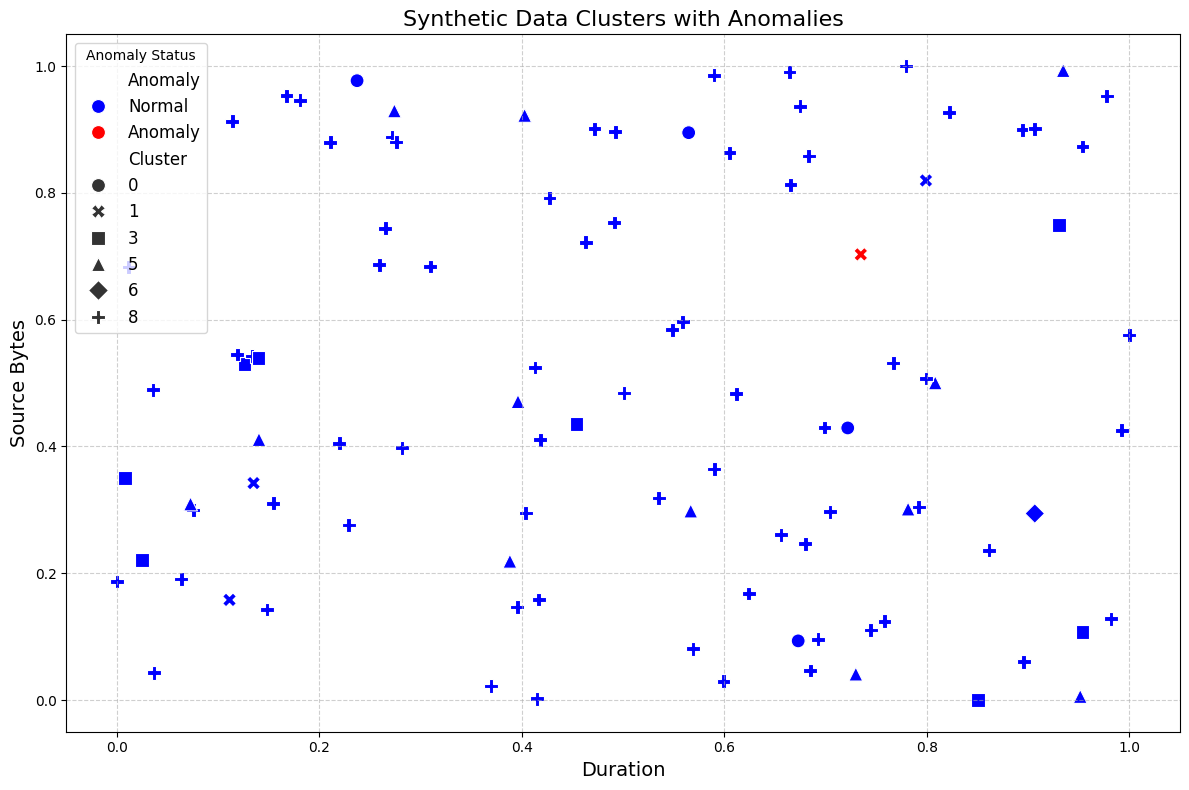

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Anomaly' is a boolean column before mapping
synthetic_data_scaled['Anomaly'] = synthetic_data_scaled['Anomaly'].map({True: 'Anomaly', False: 'Normal'})

# Check data integrity
print(synthetic_data_scaled[['duration', 'src_bytes', 'Anomaly', 'Cluster']].head())

# Define a list of markers for each cluster (the number of markers should be equal to the number of clusters)
markers = ['o', 'X', 's', '^', 'D', 'P']  # Add more markers if needed for more clusters

# Visualize the clusters with anomalies highlighted
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=synthetic_data_scaled['duration'],
    y=synthetic_data_scaled['src_bytes'],
    hue=synthetic_data_scaled['Anomaly'],
    style=synthetic_data_scaled['Cluster'],
    palette={'Anomaly': 'red', 'Normal': 'blue'},
    markers=markers,
    s=100  # Adjust marker size for better visualization
)

# Adding plot details
plt.title('Synthetic Data Clusters with Anomalies', fontsize=16)
plt.xlabel('Duration', fontsize=14)
plt.ylabel('Source Bytes', fontsize=14)
plt.legend(title='Anomaly Status', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


Additional documentation is provided in report.

*# END...*